In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [2]:
catImg = cv2.imread('./cat.jpg', cv2.IMREAD_COLOR)

array([[[ 49,  42,  33],
        [ 50,  43,  34],
        [ 51,  44,  35],
        ...,
        [  4,  21,  47],
        [  3,  20,  46],
        [  3,  20,  46]],

       [[ 52,  45,  36],
        [ 52,  45,  36],
        [ 53,  46,  37],
        ...,
        [  4,  21,  47],
        [  4,  21,  47],
        [  3,  20,  46]],

       [[ 54,  49,  40],
        [ 55,  50,  41],
        [ 58,  51,  42],
        ...,
        [  4,  21,  47],
        [  4,  21,  47],
        [  4,  21,  47]],

       ...,

       [[ 38,  73,  99],
        [ 38,  73,  99],
        [ 38,  73,  99],
        ...,
        [ 27,  64,  98],
        [ 27,  65,  97],
        [ 26,  64,  96]],

       [[ 38,  73,  99],
        [ 38,  73,  99],
        [ 38,  73,  99],
        ...,
        [ 28,  65,  99],
        [ 28,  66,  98],
        [ 27,  65,  97]],

       [[ 38,  73,  99],
        [ 38,  73,  99],
        [ 38,  73,  99],
        ...,
        [ 29,  66, 100],
        [ 28,  66,  98],
        [ 28,  66,  98]]

In [5]:
# extract separated channels data from image
catImgB = catImg[:,:,0]
catImgG = catImg[:,:,1]
catImgR = catImg[:,:,2]

In [6]:
# write each separation to file
cv2.imwrite('catImgG.jpg', catImgB)
cv2.imwrite('catImgR.jpg', catImgG)
cv2.imwrite('catImgB.jpg', catImgR)

True

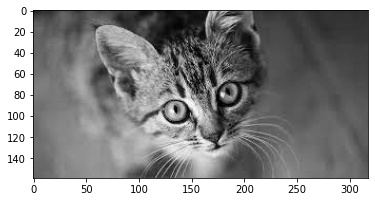

In [7]:
plt.imshow(catImgR, cmap='gray')

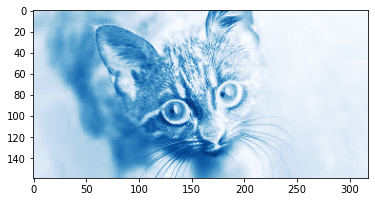

In [8]:
plt.imshow(catImgB, cmap='Blues')

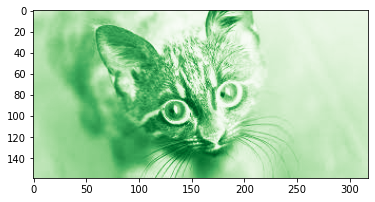

In [9]:
plt.imshow(catImgG, cmap='Greens')

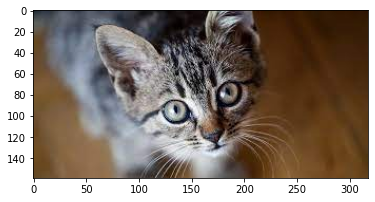

In [10]:
catImgMerged = catImg.copy()
catImgMerged[:,:,0] = catImgR
catImgMerged[:,:,1] = catImgG
catImgMerged[:,:,2] = catImgB
plt.imshow(catImgMerged)

True

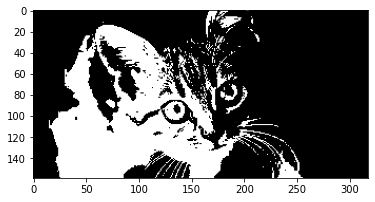

In [11]:
catImgRedThresholded = catImgR.copy()

max_value = 255
threshold = 128
for x in range(catImgRedThresholded.shape[0]):
    for y in range(catImgRedThresholded.shape[1]):
        value = catImgRedThresholded[x, y]
        if value < threshold:
            catImgRedThresholded[x, y] = 0
        else:
            catImgRedThresholded[x, y] = max_value
plt.imshow(catImgRedThresholded, cmap='gray')
cv2.imwrite('catImgRedThresholded.jpg', catImgRedThresholded)

True

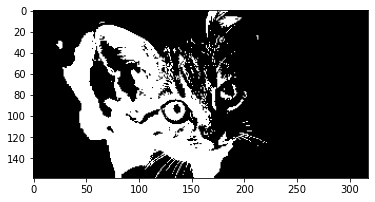

In [12]:
catImgGreenThresholded = catImgG.copy()

max_value = 255
threshold = 128
for x in range(catImgGreenThresholded.shape[0]):
    for y in range(catImgGreenThresholded.shape[1]):
        value = catImgGreenThresholded[x, y]
        if value < threshold:
            catImgGreenThresholded[x, y] = 0
        else:
            catImgGreenThresholded[x, y] = max_value
plt.imshow(catImgGreenThresholded, cmap='gray')
cv2.imwrite('catImgGreenThresholded.jpg', catImgGreenThresholded)

True

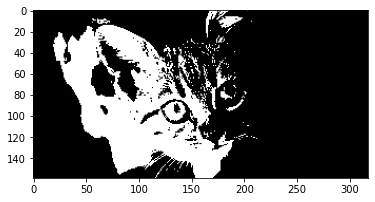

In [13]:
catImgBlueThresholded = catImgB.copy()

max_value = 255
threshold = 128
for x in range(catImgBlueThresholded.shape[0]):
    for y in range(catImgBlueThresholded.shape[1]):
        value = catImgBlueThresholded[x, y]
        if value < threshold:
            catImgBlueThresholded[x, y] = 0
        else:
            catImgBlueThresholded[x, y] = max_value
plt.imshow(catImgBlueThresholded, cmap='gray')
cv2.imwrite('catImgBlueThresholded.jpg', catImgBlueThresholded)

True

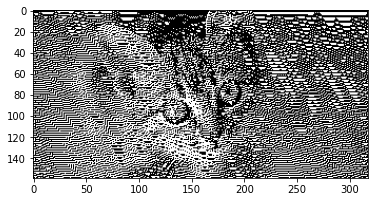

In [14]:
catImgRedDithered = catImgR.copy()
# catImgRedDithered[:,:] = 0
# print(catImgRedDithered)
# plt.imshow(catImgRedDithered, cmap='gray')

max_value = 255
threshold = 128

totalPixelsX = catImgRedDithered.shape[1]
totalPixelsY = catImgRedDithered.shape[0]
frames = round(totalPixelsX * totalPixelsY / 100)
video = np.zeros(shape=(frames, totalPixelsY, totalPixelsX))

frame = 0
for y in range(totalPixelsY):
    for x in range(totalPixelsX):
#         print(x, '/', totalPixelsX, ', ', y, '/', totalPixelsY)
        index = totalPixelsX * y + x
        if index % 100 == 0:
            video[frame] = catImgRedDithered
            frame =+ 1
        value = catImgRedDithered[y, x].copy()
#         print('value', value)
        if value < threshold:
            catImgRedDithered[y, x] = 0
        else:
            catImgRedDithered[y, x] = max_value
        newValue = catImgRedDithered[y, x].copy()
        err = int(value) - int(newValue)
#         print('err', err)
        if x < totalPixelsX - 1:
            catImgRedDithered[y  , x+1] = catImgRedDithered[y  , x+1] + (1 / 16.0) * err
        if y < totalPixelsY - 1:
            catImgRedDithered[y+1, x-1] = catImgRedDithered[y+1, x-1] + (3 / 16.0) * err
            catImgRedDithered[y+1, x  ] = catImgRedDithered[y+1, x  ] + (5 / 16.0) * err
        if x < totalPixelsX - 1 and y < totalPixelsY - 1:
            catImgRedDithered[y+1, x+1] = catImgRedDithered[y+1, x+1] + (7 / 16.0) * err
plt.imshow(catImgRedDithered, cmap='gray')

cv2.imwrite('catImgRedDithered.jpg', catImgRedDithered)

True

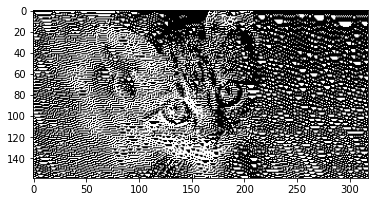

In [15]:
catImgGreenDithered = catImgG.copy()

max_value = 255
threshold = 128

totalPixelsX = catImgGreenDithered.shape[1]
totalPixelsY = catImgGreenDithered.shape[0]
frames = round(totalPixelsX * totalPixelsY / 100)
video = np.zeros(shape=(frames, totalPixelsY, totalPixelsX))

frame = 0
for y in range(totalPixelsY):
    for x in range(totalPixelsX):
        index = totalPixelsX * y + x
        if index % 100 == 0:
            video[frame] = catImgGreenDithered
            frame =+ 1
        value = catImgGreenDithered[y, x].copy()
#         print('value', value)
        if value < threshold:
            catImgGreenDithered[y, x] = 0
        else:
            catImgGreenDithered[y, x] = max_value
        newValue = catImgGreenDithered[y, x].copy()
        err = int(value) - int(newValue)
#         print('err', err)
        if x < totalPixelsX - 1:
            catImgGreenDithered[y  , x+1] = catImgGreenDithered[y  , x+1] + (1 / 16.0) * err
        if y < totalPixelsY - 1:
            catImgGreenDithered[y+1, x-1] = catImgGreenDithered[y+1, x-1] + (3 / 16.0) * err
            catImgGreenDithered[y+1, x  ] = catImgGreenDithered[y+1, x  ] + (5 / 16.0) * err
        if x < totalPixelsX - 1 and y < totalPixelsY - 1:
            catImgGreenDithered[y+1, x+1] = catImgGreenDithered[y+1, x+1] + (7 / 16.0) * err
plt.imshow(catImgGreenDithered, cmap='gray')

cv2.imwrite('catImgGreenDithered.jpg', catImgGreenDithered)

True

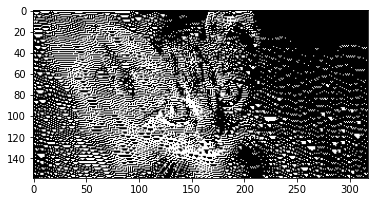

In [16]:
catImgBlueDithered = catImgB.copy()

max_value = 255
threshold = 128

totalPixelsX = catImgBlueDithered.shape[1]
totalPixelsY = catImgBlueDithered.shape[0]
frames = round(totalPixelsX * totalPixelsY / 100)
video = np.zeros(shape=(frames, totalPixelsY, totalPixelsX))

frame = 0
for y in range(totalPixelsY):
    for x in range(totalPixelsX):
        index = totalPixelsX * y + x
        if index % 100 == 0:
            video[frame] = catImgBlueDithered
            frame =+ 1
        value = catImgBlueDithered[y, x].copy()
#         print('value', value)
        if value < threshold:
            catImgBlueDithered[y, x] = 0
        else:
            catImgBlueDithered[y, x] = max_value
        newValue = catImgBlueDithered[y, x].copy()
        err = int(value) - int(newValue)
#         print('err', err)
        if x < totalPixelsX - 1:
            catImgBlueDithered[y  , x+1] = catImgBlueDithered[y  , x+1] + (1 / 16.0) * err
        if y < totalPixelsY - 1:
            catImgBlueDithered[y+1, x-1] = catImgBlueDithered[y+1, x-1] + (3 / 16.0) * err
            catImgBlueDithered[y+1, x  ] = catImgBlueDithered[y+1, x  ] + (5 / 16.0) * err
        if x < totalPixelsX - 1 and y < totalPixelsY - 1:
            catImgBlueDithered[y+1, x+1] = catImgBlueDithered[y+1, x+1] + (7 / 16.0) * err
plt.imshow(catImgBlueDithered, cmap='gray')

cv2.imwrite('catImgBlueDithered.jpg', catImgBlueDithered)